In [2]:
import numpy as np
import numpy.linalg as la
from scipy.optimize import minimize
import sys
import matplotlib.pyplot as plt

In [36]:
n = 50

kappa = 100
des = np.random.uniform(low = 1, high = kappa, size = n) 
des = 1 + (kappa - 1) * (des - min(des)) / (max(des) - min(des))
s = np.diag(des)
q, _ = la.qr(np.random.rand(n, n))
A = np.array([q.T @ s @ q]).squeeze()


In [42]:
scale = 2

def phi(x):
    return x.transpose() @ A @ x

def noisy_phi(x):
    xi = np.random.normal(0, scale)
    return phi(x) + xi

def grad(z, tau, e):
    return n * (noisy_phi(z + tau * e) - noisy_phi(z - tau * e)) / (2 * tau) * e

def step(x_prev, gamma, tau, batch_size):
    g = np.zeros(n)
    for _ in range(batch_size):
        e = np.random.normal(0, 1, n)
        e /= la.norm(e, 2)
        g += grad(x_prev, tau, e)
        
    g /= batch_size
    return x_prev - gamma * g

In [43]:
x0 = np.random.uniform(low = -100, high = 100, size = n)
z = minimize(phi, x0)
print("min: {:.2e}".format(z.fun))

mu = min(la.eig(A)[0])
L = max(la.eig(A)[0])

print('mu = {:.2f}, L = {:.2f}'.format(mu, L))

min: 2.74e-13
mu = 1.00, L = 100.00


In [58]:
x_prev = x0


N = 100000
alpha = 0.5
beta = 0.7


errors = []
xs = []


for k in range(N):

    gamma = 0.0001# / (mu * (k + 1))
    tau = 0.01# / (k + 1) ** beta
    batch_size = int((k + 1) ** alpha)
    x_next = step(x_prev, gamma, tau, batch_size)
    err = la.norm(x_next - z.x, 2)
    errors.append(err)
    xs.append(x_next)
    if k % 100 == 0:
        sys.stdout.write("\r %d. error: %.3e bsz: %d" % (k, err, batch_size))
    x_prev = x_next
    

 55600. error: 4.225e-01 bsz: 235

KeyboardInterrupt: 

In [46]:
x_prev = x0


N = 100000
alpha = 0.4
beta = 0.6


errors = []


for k in range(N):
    gamma = 0.0001
    tau = 0.01
    batch_size = 10
    x_next = step(x_prev, gamma, tau, batch_size)
    err = la.norm(x_next - z.x, 2)
    errors.append(err)
    if k % 1000 == 0:
        sys.stdout.write("\r %d. error %.3e" % (k, err))
    x_prev = x_next
    

 10000. error 7.097e+00

KeyboardInterrupt: 

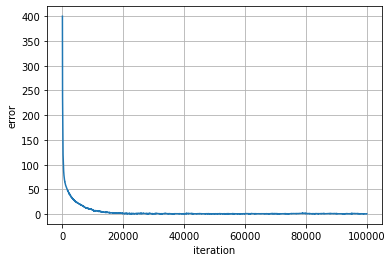

In [52]:
x = range(N)
plt.plot(x, errors)
plt.xlabel("iteration")
plt.ylabel("error")
plt.grid()
plt.show()

In [53]:
phi(x_next)

13.042010312842539

In [55]:
errors[-1]

0.709407936940266

In [56]:
errors

[400.0827407281648,
 385.05838249364933,
 384.24963794486126,
 384.2604713561472,
 383.0963544288935,
 383.08042867726334,
 378.38645264779365,
 373.0903697042616,
 345.8147222503994,
 339.5676055264571,
 338.59191573013624,
 338.04624850040096,
 334.5826823674888,
 327.15695236212196,
 327.95710995130963,
 320.4458082515249,
 319.8244440861611,
 310.82660984517645,
 307.3365113106097,
 303.1978471969888,
 302.3659168522577,
 302.3318833121599,
 300.51788064174036,
 294.27958557571174,
 291.8742707481752,
 285.5385609765771,
 281.8896464208096,
 279.8545628702802,
 278.224406038889,
 274.15199761331985,
 272.4822243039121,
 269.3081287173078,
 267.1823657149271,
 264.33179567840506,
 262.15412732654056,
 262.1850660593008,
 260.68145670101046,
 260.22953105429787,
 259.76283279981266,
 258.1172824863727,
 257.8965386229484,
 256.37439297933406,
 250.3738867111392,
 249.57286538968347,
 245.9230070631431,
 241.0496741835943,
 238.6011045757425,
 237.14481018581125,
 236.24720432832925,


In [26]:
xs

[array([  -3.95723919,   31.71729096, -109.11637257,  -59.69607331,
          39.49353128,  -57.19780644,    1.20019494,  -60.00067397,
          37.93808074,  146.64732817,  107.24008111,  -57.49891017,
         -17.95745301,  -79.3072964 ,   95.19782789,  102.79209895,
          -5.15447716,  -19.09878821,  -80.58482224, -166.74916114,
          39.24253193,  -75.41715946,   41.15376599,   98.37405635,
          74.52302955,   45.73457237, -113.67999978,  -93.28945571,
          17.23568665,   85.20375798,  -70.60270735,   18.31834153,
          68.63312119,   78.80586221,   20.10520563,  -43.58539222,
        -157.7443172 ,   -5.47372445,   32.23065692,   68.15400331,
          36.09305226,   27.3841263 ,  -17.01725062,    3.87073352,
          87.96432918,  -13.68999648,  -65.13020259,  -31.64476532,
         -30.68566201,   80.38636257]),
 array([  -5.06632645,   31.65453409, -108.34932169,  -61.25065938,
          41.4051754 ,  -58.40226244,    0.69503347,  -59.64756637,
        